In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sns # Seaborn for Image Classification
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# 필요한 함수들

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
data_shape = pd.read_csv('/content/drive/MyDrive/data_shape - 시트1.csv')

In [ ]:
display(data_shape)

,Image Number,Width,Height
0,1,6015,5400
1,3,6015,5900
2,4,6015,6020
3,8,6015,5910
4,11,6015,5630
...,...,...,...
114,211,6015,5390
115,213,6015,5880
116,214,6015,6080
117,216,6015,6020


In [ ]:
data_image = data_shape[['Image Number', 'Width','Height']]

In [ ]:
data_frame = data_image[['Image Number']]

In [ ]:
data_frame

,Image Number
0,1
1,3
2,4
3,8
4,11
...,...
114,211
115,213
116,214
117,216


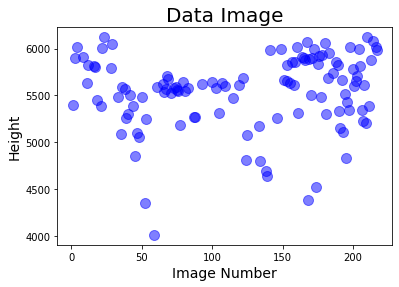

In [ ]:
# Basic Scatter Plot

plt.plot('Image Number',  # x

         'Height',  # y

         data=data_image, 

         linestyle='none', 

         marker='o', 

         markersize=10,

         color='blue', 

         alpha=0.5)

plt.title('Data Image', fontsize=20)

plt.xlabel('Image Number', fontsize=14)

plt.ylabel('Height', fontsize=14)

plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Enter_korea_by_age.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows

df1 = pd.read_csv('/content/drive/MyDrive/data_shape - 시트1.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'data_shape - 시트1.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 119 rows and 3 columns


In [ ]:
df1.head(190)

,Image Number,Width,Height
0,1,6015,5400
1,3,6015,5900
2,4,6015,6020
3,8,6015,5910
4,11,6015,5630
...,...,...,...
114,211,6015,5390
115,213,6015,5880
116,214,6015,6080
117,216,6015,6020


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


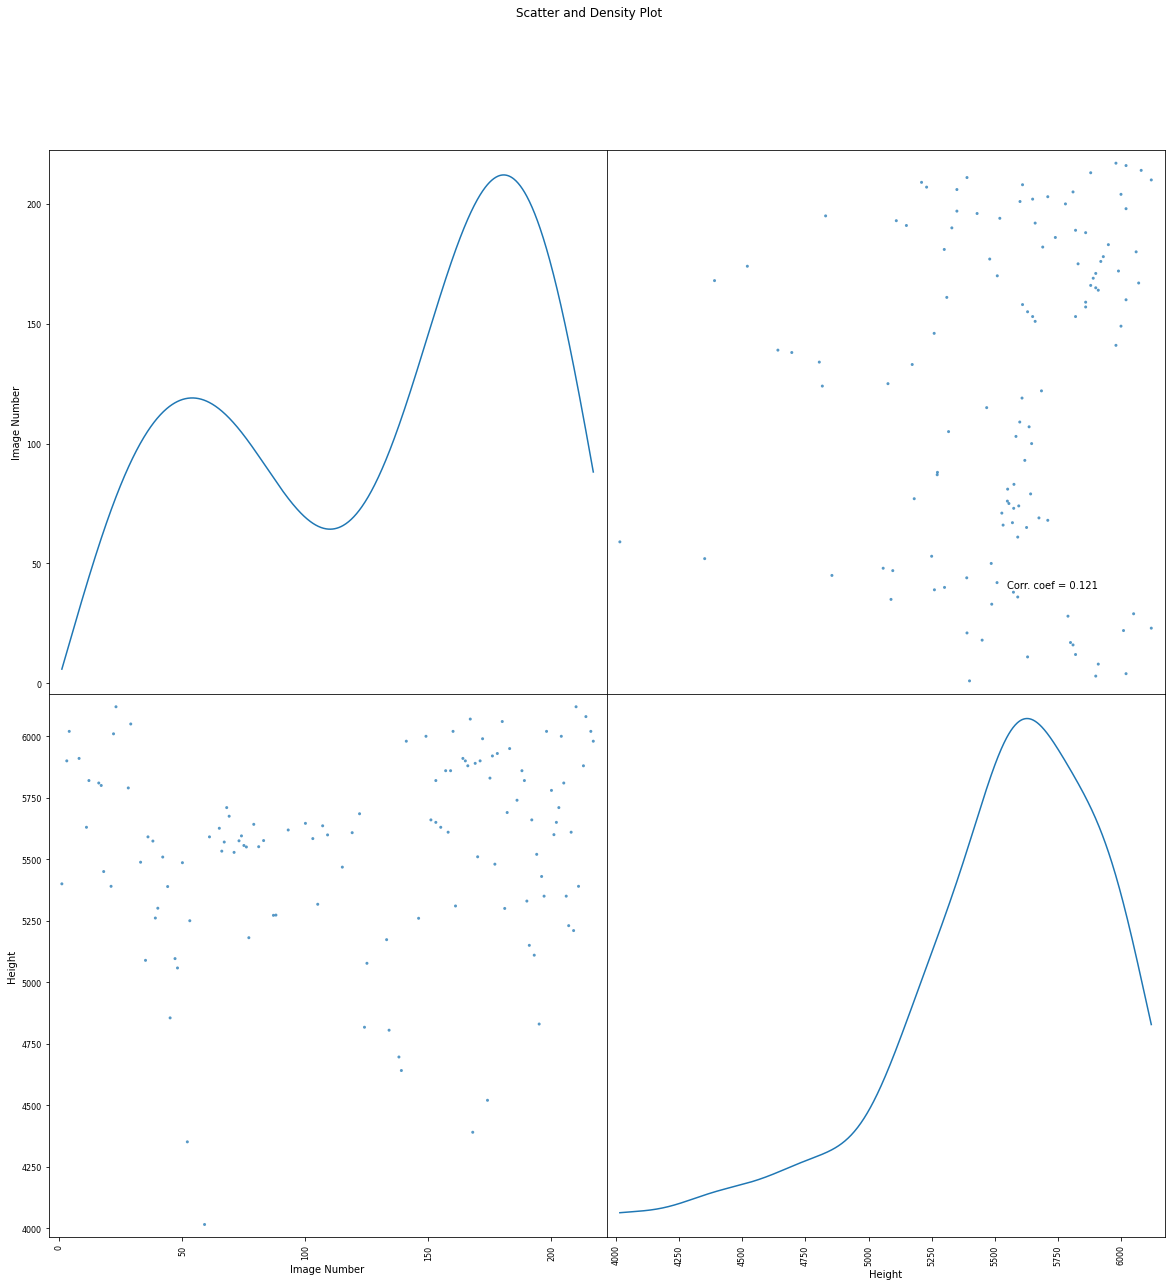

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/data_shape - 시트1.csv')


#FINDING MAX AND MIN
p=df['Height'].max()
q=df['Height'].min()
b=df['Height'].mean()

print(q,p,b)

4015 6120 5544.605042016807
